In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors


import scienceplots
plt.style.use(["science", "no-latex"])

from cmap import Colormap
cmap = Colormap('crameri:batlow').to_mpl()

In [27]:
folder = "experiments/2d-poisson/results"

In [34]:
poisson_agg_then_plateau_lm_time = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_time.npy")
poisson_agg_then_plateau_lm_l2err = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_l2err.npy")
poisson_agg_then_plateau_lm_loss = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_loss.npy")
poisson_agg_then_plateau_lm_lambda = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_lambda.npy")
poisson_agg_then_plateau_lm_searchdirnorm = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_searchdirnorm.npy")
poisson_agg_then_plateau_lm_svs = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_svs.npy")
poisson_agg_then_plateau_lm_u_pred = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_u_pred.npy")
poisson_agg_then_plateau_lm_u_solution = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_u_solution.npy")
poisson_agg_then_plateau_lm_X = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_X.npy")
poisson_agg_then_plateau_lm_Y = np.load("experiments/2d-poisson/results/poisson_agg_then_plateau_lm_Y.npy")

bfgs_time = np.load(folder+"/bfgs_"+"time"+".npy")
bfgs_l2err = np.load(folder+"/bfgs_"+"l2err"+".npy")
bfgs_loss = np.load(folder+"/bfgs_"+"loss"+".npy")
bfgs_upred = np.load(folder+"/bfgs_"+"upred"+".npy")


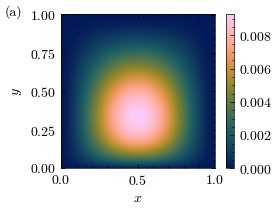

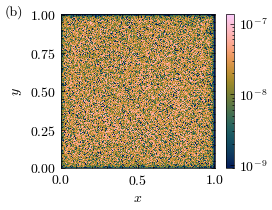

In [57]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_aspect("equal")
ax_nn = ax.pcolormesh(poisson_agg_then_plateau_lm_X, poisson_agg_then_plateau_lm_Y, poisson_agg_then_plateau_lm_u_pred, cmap=cmap, rasterized=True,
                      )
fig.colorbar(ax_nn, ax=ax, pad=0.03)
ax.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
            xytext=(-40, 7), textcoords='offset points',
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.savefig("2dpoisson_agg_then_plateau_lm.pdf", format="pdf")
plt.show()


error = np.abs(poisson_agg_then_plateau_lm_u_solution - poisson_agg_then_plateau_lm_u_pred)
rel_l2_error = np.linalg.norm(error) / np.linalg.norm(poisson_agg_then_plateau_lm_u_solution)


norm = colors.LogNorm(vmin=error.min() + 9e-10, vmax=error.max())
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_aspect("equal")
nn_error = ax.pcolormesh(poisson_agg_then_plateau_lm_X, poisson_agg_then_plateau_lm_Y, np.abs(error) + 1e-10, norm=norm, cmap=cmap, rasterized=True,)
fig.colorbar(nn_error, ax=ax, pad=0.03)
ax.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
            xytext=(-40, 7), textcoords='offset points',
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.savefig("2dpoisson_agg_then_plateau_lm_err.pdf", format="pdf")
plt.show()

# fig, ax = plt.subplots(figsize=(5, 2))
# ax.set_aspect("equal")
# ax_nn = ax.pcolormesh(poisson_agg_then_plateau_lm_X, poisson_agg_then_plateau_lm_Y, bfgs_upred, cmap=cmap, rasterized=True,
#                       )
# fig.colorbar(ax_nn, ax=ax, pad=0.03)
# ax.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, 7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax.set_xlabel("$x$")
# ax.set_ylabel("$y$")
# fig.savefig("2dpoisson_agg_then_plateau_lm.pdf", format="pdf")
# plt.show()


# error = np.abs(poisson_agg_then_plateau_lm_u_solution - bfgs_upred)
# rel_l2_error = np.linalg.norm(error) / np.linalg.norm(poisson_agg_then_plateau_lm_u_solution)


# norm = colors.LogNorm(vmin=error.min() + 9e-10, vmax=error.max())
# fig, ax = plt.subplots(figsize=(5, 2))
# ax.set_aspect("equal")
# nn_error = ax.pcolormesh(poisson_agg_then_plateau_lm_X, poisson_agg_then_plateau_lm_Y, np.abs(error) + 1e-10, norm=norm, cmap=cmap, rasterized=True,)
# fig.colorbar(nn_error, ax=ax, pad=0.03)
# ax.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, 7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax.set_xlabel("$x$")
# ax.set_ylabel("$y$")
# fig.savefig("2dpoisson_agg_then_plateau_lm_err.pdf", format="pdf")
# plt.show()

In [46]:

print(len(poisson_agg_then_plateau_lm_loss))

agg_loss = poisson_agg_then_plateau_lm_loss[:250]
agg_time = poisson_agg_then_plateau_lm_time[:250]
agg_l2   = poisson_agg_then_plateau_lm_l2err[:250]

plateau_loss = poisson_agg_then_plateau_lm_loss[250:]
plateau_time = poisson_agg_then_plateau_lm_time[250:]
plateau_l2   = poisson_agg_then_plateau_lm_l2err[250:]

bfgs_loss = np.insert(bfgs_loss, 0, agg_loss[0], axis=0)
bfgs_time = np.insert(bfgs_time, 0, agg_time[0], axis=0)
bfgs_l2err = np.insert(bfgs_l2err, 0, agg_l2[0], axis=0)

400


/tmp/ipykernel_718187/2726319280.py:57: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


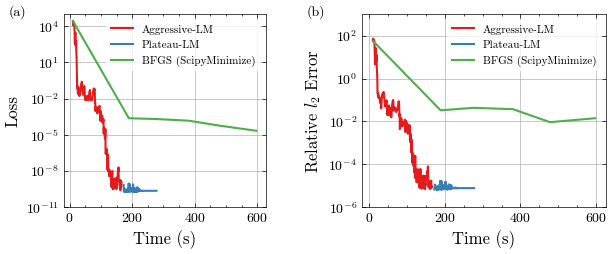

In [56]:
c1 = "#E41A1C"
c2 = "#377EB8"
c3 = "#4DAF4A"
c4 = "#984EA3"

fig = plt.figure(figsize=(7, 2.5))

# Create a GridSpec with 1 row and 3 columns to achieve a 1/3 and 2/3 ratio
gs = gridspec.GridSpec(1, 13, figure=fig)

# Add subplots to the figure using the GridSpec
# The left plot occupies the first column (1/3 width)
ax1 = fig.add_subplot(gs[0, 0:5])
# The right plot occupies the remaining two columns (2/3 width)
ax2 = fig.add_subplot(gs[0, 7:])

# --- Plot 1: Loss vs. Time ---
ax1.plot(agg_time, agg_loss, color=c1, linestyle='-', linewidth=1.5, label="Aggressive-LM")
ax1.plot(plateau_time, plateau_loss, color=c2, linestyle='-', linewidth=1.5, label="Plateau-LM")
ax1.plot(bfgs_time, bfgs_loss, color=c3, linestyle='-', linewidth=1.5, label="BFGS (ScipyMinimize)")

# ax1.plot(poisson_agg_then_plateauBFGS_time[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4], poisson_agg_then_plateauBFGS_loss[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4],
        #  color=c1, linestyle='-', linewidth=1.5, label="BFGS")
ax1.set_yscale('log')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel(r'Loss', fontsize=12)
ax1.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none', loc=1)
ax1.grid()
ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax1.set_ylim([1e-11, 1e5])

# --- Plot 2: Relative l2 Error vs. Time ---
ax2.plot(agg_time, agg_l2, color=c1, linestyle='-', linewidth=1.5, label="Aggressive-LM")
ax2.plot(plateau_time, plateau_l2, color=c2, linestyle='-', linewidth=1.5, label="Plateau-LM")
ax2.plot(bfgs_time, bfgs_l2err, color=c3, linestyle='-', linewidth=1.5, label="BFGS (ScipyMinimize)")


# ax2.plot(poisson_agg_then_plateauBFGS_time[::4], poisson_agg_then_plateauBFGS_l2err[::4], color=c1, linestyle='-', linewidth=1.5, label="BFGS")
# ax2.scatter(263, 1.04e-4, color=c3, marker="o", linewidth=1.5, label="BFGS (Kiyani et. al)")
# ax2.scatter(171, 4.04e-5, color=c4, marker="v", linewidth=1.5, label="SSBroyden (Kiyani et. al)")
ax2.set_yscale('log')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel(r'Relative $l_2$ Error', fontsize=12)
ax2.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
ax2.grid()
ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
             xytext=(-40, 7), textcoords='offset points',
             ha='left', va='top',
             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
ax2.set_ylim([1e-6, 1e3])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig("2dpoisson_agg_then_plateau_losses.pdf", format="pdf")
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2.5))

# ax1.plot(poisson_agg_then_plateauBFGS_time[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4], poisson_agg_then_plateauBFGS_loss[~np.isnan(poisson_agg_then_plateauBFGS_loss)][::4], color=c1, linestyle='-', linewidth=2, label="BFGS")
# ax1.plot(poisson_agg_then_plateau_lm_time, poisson_agg_then_plateau_lm_loss, color=c2, linestyle='--', linewidth=2, label="LM-SVD")
# ax1.set_yscale('log')
# ax1.set_xlabel('Time (s)', fontsize=12)
# ax1.set_ylabel(r'Loss', fontsize=12)
# ax1.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
# ax1.grid()
# ax1.annotate("(a)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, -7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax1.set_ylim([1e-11, 1e2])

# ax2.plot(poisson_agg_then_plateauBFGS_time[::4], poisson_agg_then_plateauBFGS_l2err[::4], color=c1, linestyle='-', linewidth=2, label="BFGS")
# ax2.plot(poisson_agg_then_plateau_lm_time, poisson_agg_then_plateau_lm_l2err, color=c2, linestyle='--', linewidth=2, label="LM-SVD")
# ax2.scatter(263, 1.04e-4, color=c3, marker="o", linewidth=2, label="BFGS (Kiyani et. al)")
# ax2.scatter(171, 4.04e-5, color=c4, marker="v", linewidth=2, label="SSBroyden (Kiyani et. al)")
# ax2.set_yscale('log')
# ax2.set_xlabel('Time (s)', fontsize=12)
# ax2.set_ylabel(r'Relative $l_2$ Error', fontsize=12)
# ax2.legend(fontsize=8, facecolor='white', frameon=True, framealpha=0.8, fancybox=True, edgecolor='none')
# ax2.grid()
# ax2.annotate("(b)", xy=(0, 1), xycoords='axes fraction',
#             xytext=(-40, -7), textcoords='offset points',
#             ha='left', va='top',
#             bbox=dict(facecolor='white', alpha=1.0, linewidth=0))
# ax2.set_ylim([1e-7, 5e0])

# plt.subplots_adjust(wspace=5) 
# plt.tight_layout()
# plt.show
# fig.savefig("poisson_agg_then_plateau_losses.pdf", format="pdf")

In [ ]:
print(poisson_agg_then_plateau_lm_l2err[-1])

9.557610694701962e-07
